### Замер производительности Sat-solver 

[Репозиторий с реализацией алгоритма на языке C#: ](https://github.com/ploskiy-2/SAT_Solver)

## Характеристики тествого стенда:

- OS: Ubuntu 22.04.4 LTS
- CPU model: 12th Gen Intel(R) Core(TM) i5-12500H
- Architecture: x86-64
- CPU frequency (MAX): 4.5 GHz
- RAM (Total): 15Gi

## Подготовка тестового стенда:

1. Все измерения производились на одном ядре
2. Отключение swap
3. Установка максимальной частоты процессора
4. Сборка программы в Release режиме
5. Запуск программы на одном ядре

Были использованы следующие команды:
```bash
sudo swapoff -a
```
```bash
sudo cpupower frequency-set -g performance
```
```bash
sudo cpupower frequency-set -d 4.5GHz -u 4.5GHz
```
Запуск программы после предварительной сборки осуществлялся с помощью следующей команды:
```bash
sudo nice -n -20 taskset -c 0 ./src/bin/Release/net8.0/src
```

## Тестовые данные:

Измерения были сделаны с помощью методов класса Stopwatch. Все измерения представлены в миллисекундах (затем для анализа были переведены в секунды).

Для измерений был выбран файл, состоящий из 100 переменных и 430 дизъюнктов. Время работы алгоритма на данном наборе составляет примерно 2 секунды. Для данного набора существует модель, то есть КНФ является разрешимой. 

## Измерения:

Перед измерением времени работы алгоритма был проведен прогрев на других входных значениях. Время работы на <<разогревающем наборе>> состовляет примерно 30 секунд. Было проведено 30 итераций прогрева.

После чего были выполнены основные измерения. Всего было сделано 100 замеров два раза. При первом эксперименте был одиночный выброс, который был отброшен, поэтому в файле "measurements-1.txt" 99 значений, а не 100.

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

(array([ 1.,  3.,  7., 16., 15., 20., 17., 14.,  2.,  5.]),
 array([1.9833531 , 1.98460268, 1.98585226, 1.98710184, 1.98835142,
        1.989601  , 1.99085058, 1.99210016, 1.99334974, 1.99459932,
        1.9958489 ]),
 <BarContainer object of 10 artists>)

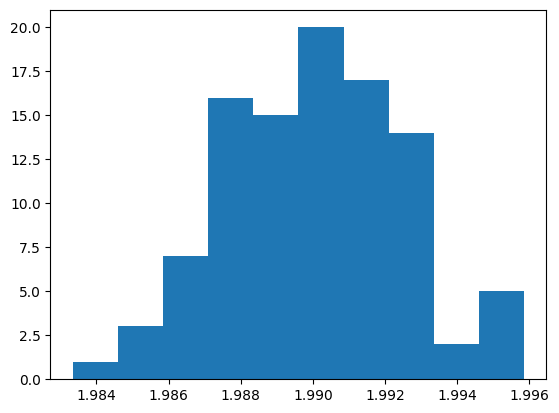

In [3]:
f = open("measurements-2.txt")
m = []
for l in f:
    m.append(float(l.strip().replace(",","."))/1000.0)
t2 = [
    "1983,3531", "1992,7897", "1990,7218", "1988,8887", "1989,9196",
    "1988,9192", "1992,2024", "1990,2633", "1992,1697", "1986,8122",
    "1987,5765", "1989,7288", "1995,4642", "1986,4815", "1989,3289",
    "1987,6725", "1991,0966", "1986,2383", "1995,8489", "1985,6987",
    "1988,4006", "1989,8544", "1989,6992", "1987,0998", "1993,2061",
    "1987,7116", "1990,2141", "1992,1865", "1988,8526", "1986,0772",
    "1990,9699", "1988,335", "1988,5635", "1990,4904", "1989,7238",
    "1989,4128", "1990,5345", "1994,5534", "1991,2595", "1988,1352",
    "1989,0077", "1991,1676", "1991,1334", "1987,9681", "1991,6769",
    "1987,9823", "1987,8968", "1990,816", "1988,4476", "1988,1754",
    "1992,2884", "1987,0836", "1988,1001", "1989,0599", "1990,3259",
    "1988,3428", "1991,4024", "1992,9008", "1991,6273", "1992,581",
    "1989,3805", "1995,7864", "1990,1543", "1992,4731", "1991,2679",
    "1988,8421", "1990,2478", "1987,5657", "1989,8051", "1989,459",
    "1992,1599", "1991,4288", "1991,0845", "1988,8044", "1992,6393",
    "1994,3188", "1990,5531", "1989,894", "1991,035", "1991,746",
    "1987,8134", "1995,8151", "1989,7041", "1985,2504", "1991,007",
    "1991,3838", "1992,823", "1995,5946", "1988,187", "1992,224",
    "1992,1466", "1989,6871", "1985,165", "1989,9251", "1986,9029",
    "1991,7029", "1990,8593", "1988,4316", "1987,5327", "1988,1582"
]
plt.hist(m)

In [4]:
stats.normaltest(m)

NormaltestResult(statistic=1.1472874266779225, pvalue=0.5634685757002854)

In [5]:
stats.shapiro(m)

ShapiroResult(statistic=0.9855625323397981, pvalue=0.34839845090885446)

## Анализ результатов:

Полученная гистограмма и p-values соответствуют нормальному распределению.

# Вычисление основных статистических величин:

Вычисление среднего:

In [5]:
np.mean(m)

1.9900339820000001

Вычисление стандартного отклонения:

In [6]:
np.std(m, ddof=1)/len(m)**0.5

0.0002455990392809323

Доверительный интервал:

In [7]:
stats.t.ppf(0.975, df=len(m)-1)*stats.sem(m)

0.00048732177701547267

Итоговый интервал:

1.9900 &plusmn; 0.0005